In [49]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [57]:
df = pd.read_csv("z_score_extremity.csv")
df

,outlet,Extremity,label,Drives_zscore,Cognition_zscore,emo_pos_zscore,emo_neg_zscore,emo_anx_zscore,emo_anger_zscore,emo_sad_zscore,Social_zscore,Lifestyle_zscore,Physical_zscore,focuspast_zscore,focuspresent_zscore,focusfuture_zscore,Moral_zscore,Affect_zscore,Moral-Emotional_zscore
0,Daily Caller,0.499892,0,-0.953551,0.005567,-0.506355,0.535480,-0.462869,0.648593,-0.260377,0.256576,-0.298635,-0.217865,0.292218,-0.565834,-0.748367,0.023332,-1.582358,0.359187
1,NYTimes,0.499977,1,-1.620571,-0.469588,-0.506355,-0.377186,-0.462869,-0.556865,1.533608,-1.588470,-0.558101,-0.554234,-0.683851,-0.074194,-0.558605,-0.169902,0.312998,1.225537
2,HuffPost,0.499961,1,0.991925,0.718300,-0.506355,-0.911429,-0.462869,-0.556865,-0.260377,0.743354,0.716862,-0.751133,-0.889910,-0.008153,1.022750,-0.069715,-0.472217,-0.381973
3,FoxNews,0.499971,0,-0.167949,1.145940,-0.506355,0.713561,0.452696,-0.556865,1.533608,0.337706,-1.510968,-0.357335,0.129540,0.131267,-0.862225,-0.487775,0.617208,0.986738
4,CNN,0.499972,1,-0.167949,0.623269,-0.506355,0.713561,1.368261,0.319832,-0.260377,0.403133,-1.077033,-0.152232,-0.526595,1.907039,-0.558605,-0.725825,1.675490,-0.685518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,HuffPost,0.499933,1,-0.986902,0.683744,0.275267,0.112537,0.414548,-0.556865,-0.260377,-0.101965,0.609497,-0.562438,-0.504905,0.512838,0.567320,0.056417,1.450810,-0.204633
176,HuffPost,0.495781,1,0.006217,-0.987939,2.144361,-0.332665,-0.462869,-0.556865,1.683107,-0.630616,-0.781779,-0.111211,-0.542863,-0.485117,-0.836923,3.101734,-0.799911,3.534732
177,HuffPost,0.499833,1,-1.335235,0.830610,0.309250,-0.377186,-0.462869,0.319832,-0.260377,1.224898,-0.535733,0.438465,2.493796,-1.651844,-0.862225,-1.916075,1.557903,1.822866
178,HuffPost,0.499985,1,0.954868,-1.186640,-0.506355,1.225544,-0.462869,0.319832,1.533608,0.418836,0.515552,2.391047,-1.584003,1.679565,-0.862225,0.894964,0.324366,0.956734


In [58]:
df = df.drop(columns=["outlet"])

## Correlation Matrix

In [46]:
# Calculate the correlation matrix excluding the "Extremity" column
corr_matrix = df.corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Initialize lists to store correlation values, p-values, and errors
correlation_values = []
p_values = []
errors = []

# Calculate correlations, p-values, and errors
for column in df.columns:
    if column not in ['Extremity', 'label', 'outlet']:
        correlation, p_value = stats.pearsonr(df[column], df['Extremity'])
        correlation_values.append(correlation)
        p_values.append(p_value)
        errors.append(1.96 * (1 / (len(df)**0.5)))  # Standard error for a 95% confidence interval

# Create a DataFrame to store correlation values, p-values, and errors
correlation_df = pd.DataFrame({'Correlation': correlation_values, 'P-Value': p_values, 'Error': errors}, index=df.columns[2:18])

sorted_correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
sorted_correlation_df

latex_table_file = "correlation_table.tex"

# Convert the DataFrame to LaTeX format
latex_table = sorted_correlation_df.to_latex()

# Save the LaTeX table to a file
with open(latex_table_file, "w") as f:
    f.write(latex_table)

print("Correlation table saved as:", latex_table_file)

,Correlation,P-Value,Error
Moral-Emotional_zscore,0.084110,0.261614,0.14609
Physical_zscore,0.068170,0.363203,0.14609
Affect_zscore,0.054154,0.470281,0.14609
Cognition_zscore,0.053873,0.472590,0.14609
focuspast_zscore,0.052215,0.486347,0.14609
emo_sad_zscore,0.051351,0.493600,0.14609
Social_zscore,0.049299,0.511052,0.14609
emo_pos_zscore,0.040116,0.592874,0.14609
focuspresent_zscore,0.038639,0.606564,0.14609
emo_anx_zscore,0.017946,0.811018,0.14609


In [47]:
latex_table_file = "correlation_table.tex"

# Convert the DataFrame to LaTeX format
latex_table = sorted_correlation_df.to_latex()

# Save the LaTeX table to a file
with open(latex_table_file, "w") as f:
    f.write(latex_table)

print("Correlation table saved as:", latex_table_file)

Correlation table saved as: correlation_table.tex


<Figure size 432x288 with 0 Axes>

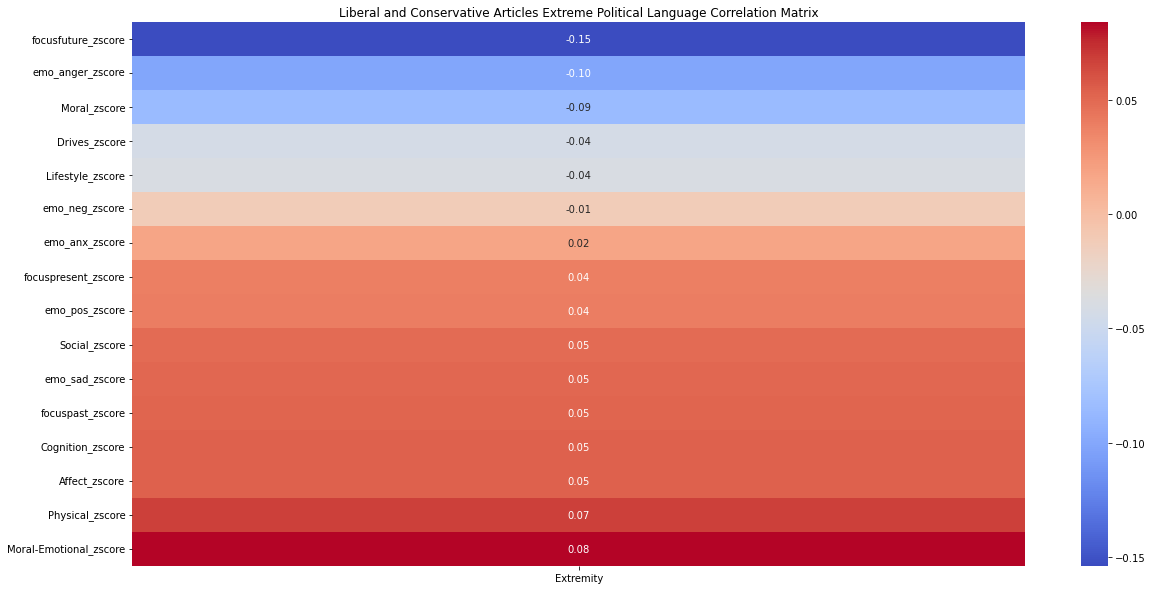

In [45]:
# Sort the correlations, excluding the "Extremity" and "label"columns
sorted_correlations = extremity_correlations.drop(index=['Extremity', 'label']).sort_values()

plt.clf()
# Create a figure and axis
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Create a heatmap for the extracted correlations
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Liberal and Conservative Articles Extreme Political Language Correlation Matrix")
# Show the plot
plt.show()

In [9]:
sorted_correlations

focusfuture_zscore       -0.153940
emo_anger_zscore         -0.101015
Moral_zscore             -0.085479
Drives_zscore            -0.042506
Lifestyle_zscore         -0.039226
emo_neg_zscore           -0.011790
emo_anx_zscore            0.017946
focuspresent_zscore       0.038639
emo_pos_zscore            0.040116
Social_zscore             0.049299
emo_sad_zscore            0.051351
focuspast_zscore          0.052215
Cognition_zscore          0.053873
Affect_zscore             0.054154
Physical_zscore           0.068170
Moral-Emotional_zscore    0.084110
Name: Extremity, dtype: float64

#### Liberal

In [54]:
# Filter the DataFrame for rows where label is equal to 1
df_filtered = df[df['label'] == 1]

# Calculate the correlation matrix excluding the "Extremity" column
corr_matrix = df_filtered.corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Initialize lists to store correlation values, p-values, and errors
correlation_values = []
p_values = []
errors = []

# Calculate correlations, p-values, and errors
for column in df_filtered.columns:
    if column not in ['Extremity', 'label', 'outlet']:
        correlation, p_value = stats.pearsonr(df_filtered[column], df_filtered['Extremity'])
        correlation_values.append(correlation)
        p_values.append(p_value)
        errors.append(1.96 * (1 / (len(df_filtered)**0.5)))  # Standard error for a 95% confidence interval

# Create a DataFrame to store correlation values, p-values, and errors
correlation_df = pd.DataFrame({'Correlation': correlation_values, 'P-Value': p_values, 'Error': errors}, index=df_filtered.columns[2:18])

# Sort the DataFrame by absolute correlation values
sorted_correlation_df = correlation_df.abs().sort_values(by='Correlation', ascending=False)

# Define the file path for saving the LaTeX table
latex_table_file = "correlation_table.tex"

# Convert the DataFrame to LaTeX format
latex_table = sorted_correlation_df.to_latex()

# Save the LaTeX table to a file
with open(latex_table_file, "w") as f:
    f.write(latex_table)

print("Correlation table saved as:", latex_table_file)

Correlation table saved as: correlation_table.tex


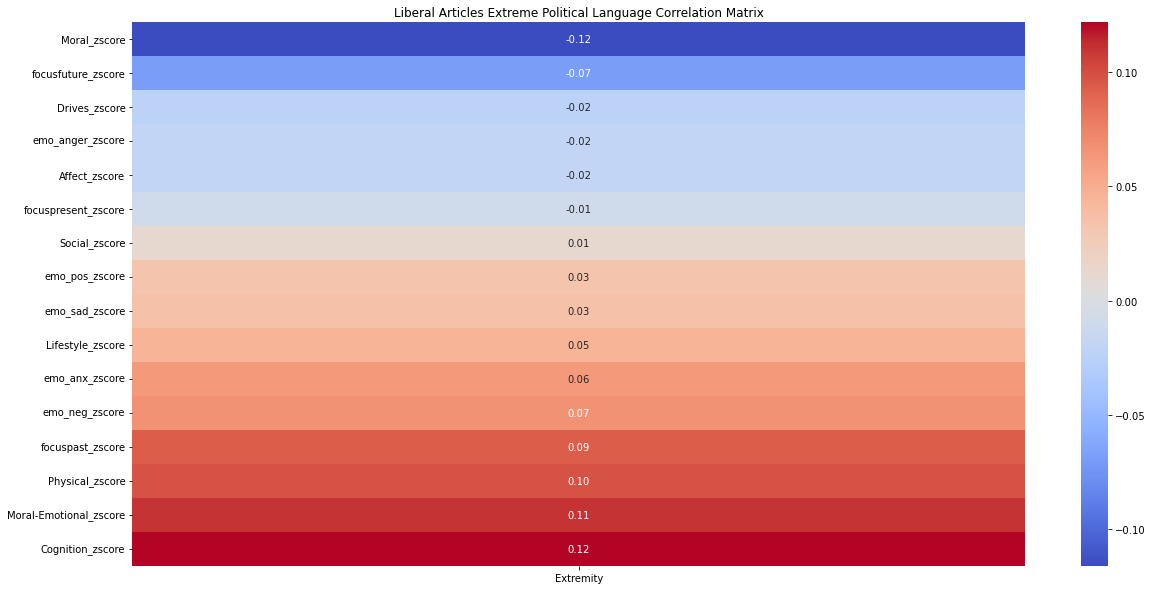

<Figure size 432x288 with 0 Axes>

In [55]:
# Sort the correlations, excluding the "Extremity" and "label"columns
sorted_correlations = extremity_correlations.drop(index=['Extremity', 'label']).sort_values()

# Create a figure and axis
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Create a heatmap for the extracted correlations
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Liberal Articles Extreme Political Language Correlation Matrix")
# Show the plot
plt.show()
plt.savefig('corr_liberal.png')

#### Conservative

In [59]:
# Filter the DataFrame for rows where label is equal to 1
df_filtered = df[df['label'] == 0]

# Calculate the correlation matrix excluding the "Extremity" column
corr_matrix = df_filtered.corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Initialize lists to store correlation values, p-values, and errors
correlation_values = []
p_values = []
errors = []

# Calculate correlations, p-values, and errors
for column in df_filtered.columns:
    if column not in ['Extremity', 'label', 'outlet']:
        correlation, p_value = stats.pearsonr(df_filtered[column], df_filtered['Extremity'])
        correlation_values.append(correlation)
        p_values.append(p_value)
        errors.append(1.96 * (1 / (len(df_filtered)**0.5)))  # Standard error for a 95% confidence interval

# Create a DataFrame to store correlation values, p-values, and errors
correlation_df = pd.DataFrame({'Correlation': correlation_values, 'P-Value': p_values, 'Error': errors}, index=df_filtered.columns[2:18])

# Sort the DataFrame by absolute correlation values
sorted_correlation_df = correlation_df.abs().sort_values(by='Correlation', ascending=False)

# Define the file path for saving the LaTeX table
latex_table_file = "correlation_table_con.tex"

# Convert the DataFrame to LaTeX format
latex_table = sorted_correlation_df.to_latex()

# Save the LaTeX table to a file
with open(latex_table_file, "w") as f:
    f.write(latex_table)

print("Correlation table saved as:", latex_table_file)

Correlation table saved as: correlation_table_con.tex


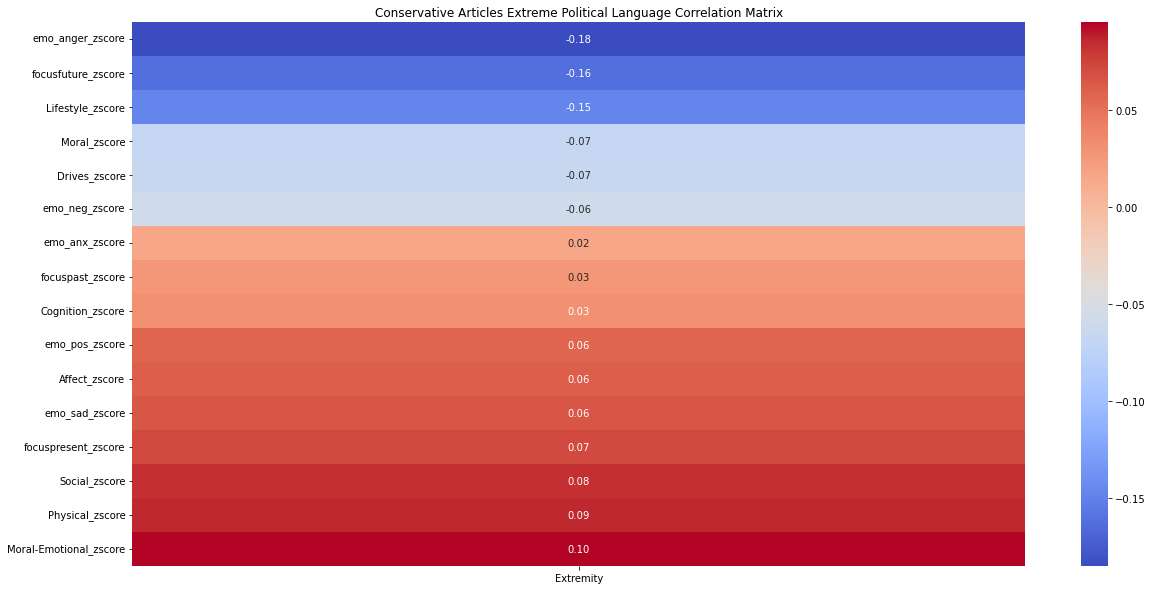

<Figure size 432x288 with 0 Axes>

In [7]:
# Calculate the correlation matrix excluding the "Extremity" column
corr_matrix = df[df['label']==0].corr()

# Extract the correlation of each variable with the "Extremity" column
extremity_correlations = corr_matrix['Extremity']

# Sort the correlations, excluding the "Extremity" and "label"columns
sorted_correlations = extremity_correlations.drop(index=['Extremity', 'label']).sort_values()

# Create a figure and axis
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

# Create a heatmap for the extracted correlations
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Conservative Articles Extreme Political Language Correlation Matrix")
# Show the plot
plt.show()
plt.savefig('corr_conservative.png')

## Regression Models -->

## Descriptive Visuals

## Using new data

In [8]:
df = pd.read_csv("../base_regression/only_test_data/liwc_data.csv")
df

,Extremity,label,WC,number,quantity,Drives,affiliation,achieve,power,cogproc,...,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,UniquelyMoral,UniquelyEmotional,MoralEmotional
0,0.499892,0,306,0.65,1.96,4.90,0.98,0.65,3.27,7.84,...,1.63,0.65,0.00,4.58,4.90,1.96,0.33,5.882353,5.882353,1.633987
1,0.499977,1,419,2.86,6.44,3.10,0.95,0.24,1.91,6.68,...,0.24,0.00,0.00,4.06,3.10,2.63,0.48,5.489260,9.785203,2.386635
2,0.499961,1,404,2.72,4.46,10.15,1.73,1.73,6.93,9.16,...,0.25,0.00,0.00,3.22,2.72,2.72,1.73,5.693069,8.168317,0.990099
3,0.499971,0,413,1.94,4.36,7.02,3.15,1.69,2.66,8.96,...,1.45,0.00,0.00,4.36,4.60,2.91,0.24,4.842615,10.411622,2.179177
4,0.499972,1,413,2.66,4.60,7.02,1.45,1.45,4.12,8.96,...,0.48,0.24,0.00,3.87,3.39,5.33,0.48,4.358354,12.590799,0.726392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.499933,1,437,3.43,4.81,4.81,0.92,2.97,1.37,9.38,...,0.23,0.00,0.23,3.66,3.43,3.43,1.37,5.949657,12.128146,1.144165
176,0.495781,1,387,2.58,2.58,7.49,1.81,0.52,4.91,5.17,...,0.00,0.00,0.00,3.10,3.36,2.07,0.26,12.144703,7.493540,4.392765
177,0.499833,1,413,5.08,8.72,3.87,1.21,0.00,2.66,9.69,...,0.48,0.24,0.00,3.63,8.96,0.48,0.24,1.937046,12.348668,2.905569
178,0.499985,1,418,2.39,5.26,10.05,2.63,0.48,6.94,4.78,...,0.48,0.00,0.00,4.31,1.44,5.02,0.24,7.655502,9.808612,2.153110


In [11]:
selected_columns = df.iloc[:, 2:52]

In [12]:
z_scores = selected_columns.apply(zscore)

In [13]:
# Add the z-scores back to the DataFrame
for i, col in enumerate(selected_columns.columns):
    df[f'{col}_zscore'] = z_scores.iloc[:, i]

In [14]:
df

,Extremity,label,WC,number,quantity,Drives,affiliation,achieve,power,cogproc,...,visual_zscore,auditory_zscore,feeling_zscore,time_zscore,focuspast_zscore,focuspresent_zscore,focusfuture_zscore,UniquelyMoral_zscore,UniquelyEmotional_zscore,MoralEmotional_zscore
0,0.499892,0,306,0.65,1.96,4.90,0.98,0.65,3.27,7.84,...,2.183123,2.391501,-0.380694,0.019947,0.292218,-0.565834,-0.748367,0.023332,-1.582358,0.359187
1,0.499977,1,419,2.86,6.44,3.10,0.95,0.24,1.91,6.68,...,-0.703708,-0.392912,-0.380694,-0.284132,-0.683851,-0.074194,-0.558605,-0.169902,0.312998,1.225537
2,0.499961,1,404,2.72,4.46,10.15,1.73,1.73,6.93,9.16,...,-0.682940,-0.392912,-0.380694,-0.775337,-0.889910,-0.008153,1.022750,-0.069715,-0.472217,-0.381973
3,0.499971,0,413,1.94,4.36,7.02,3.15,1.69,2.66,8.96,...,1.809288,-0.392912,-0.380694,-0.108702,0.129540,0.131267,-0.862225,-0.487775,0.617208,0.986738
4,0.499972,1,413,2.66,4.60,7.02,1.45,1.45,4.12,8.96,...,-0.205263,0.635179,-0.380694,-0.395238,-0.526595,1.907039,-0.558605,-0.725825,1.675490,-0.685518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.499933,1,437,3.43,4.81,4.81,0.92,2.97,1.37,9.38,...,-0.724477,-0.392912,0.408526,-0.518039,-0.504905,0.512838,0.567320,0.056417,1.450810,-0.204633
176,0.495781,1,387,2.58,2.58,7.49,1.81,0.52,4.91,5.17,...,-1.202154,-0.392912,-0.380694,-0.845510,-0.542863,-0.485117,-0.836923,3.101734,-0.799911,3.534732
177,0.499833,1,413,5.08,8.72,3.87,1.21,0.00,2.66,9.69,...,-0.205263,0.635179,-0.380694,-0.535583,2.493796,-1.651844,-0.862225,-1.916075,1.557903,1.822866
178,0.499985,1,418,2.39,5.26,10.05,2.63,0.48,6.94,4.78,...,-0.205263,-0.392912,-0.380694,-0.137940,-1.584003,1.679565,-0.862225,0.894964,0.324366,0.956734


## Moral

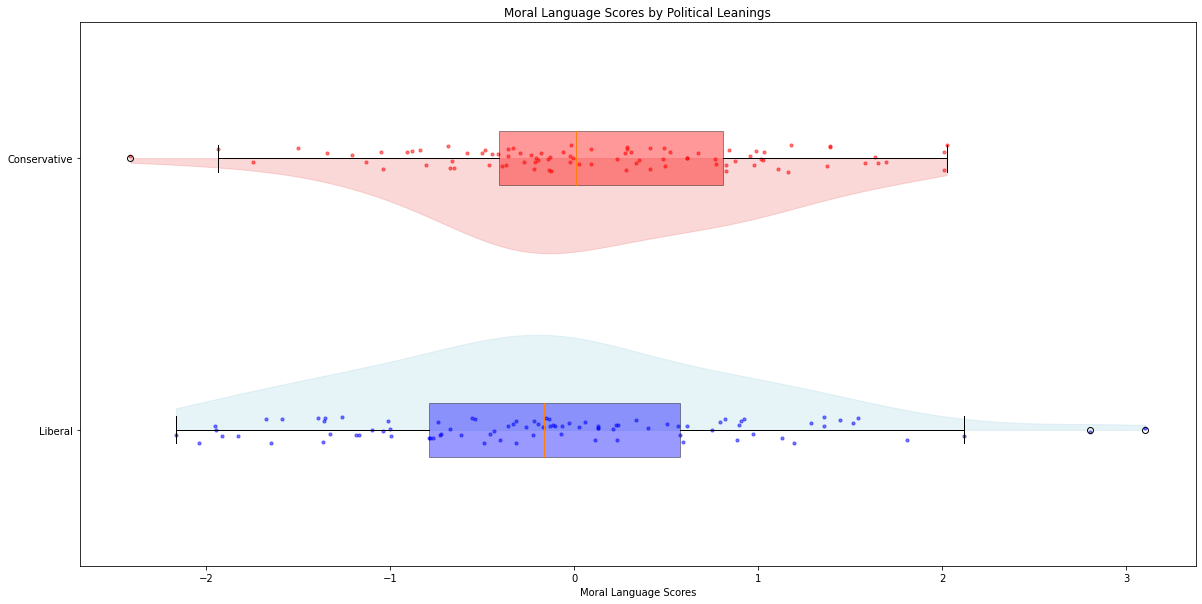

<Figure size 432x288 with 0 Axes>

In [16]:
data_liberal = df[df['label']==1]['UniquelyMoral_zscore']
data_conservative = df[df['label']==0]['UniquelyMoral_zscore']

fig, ax = plt.subplots(figsize=(20, 10))

# Boxplot data
bp_liberal = ax.boxplot(data_liberal, patch_artist=True, vert=False, positions=[1], widths=0.2)
bp_conservative = ax.boxplot(data_conservative, patch_artist=True, vert=False, positions=[2], widths=0.2)

# Change boxplot colors
for patch in bp_liberal['boxes']:
    patch.set_facecolor('blue')
    patch.set_alpha(0.4)

for patch in bp_conservative['boxes']:
    patch.set_facecolor('red')
    patch.set_alpha(0.4)

# Violinplot data
vp_liberal = ax.violinplot(data_liberal, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)
vp_conservative = ax.violinplot(data_conservative, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)

# Change violinplot colors
for b in vp_liberal['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightblue')

for b in vp_conservative['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    shift_amount = 1  # Adjust this value to align the violin plot with the label
    b.get_paths()[0].vertices[:, 1] += shift_amount  # Shift the violin plot up
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightcoral')

# Scatterplot data
scatter_colors = ['blue', 'red']
for idx, features in enumerate([data_liberal, data_conservative]):
    y = np.full(len(features), idx + 1)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=10, c=scatter_colors[idx], alpha=0.5)

plt.yticks([1, 2], ['Liberal', 'Conservative'])  # Set y-axis labels
plt.xlabel('Moral Language Scores')
plt.title("Moral Language Scores by Political Leanings")
plt.show()
plt.savefig('moral_box.png')

## Emotional

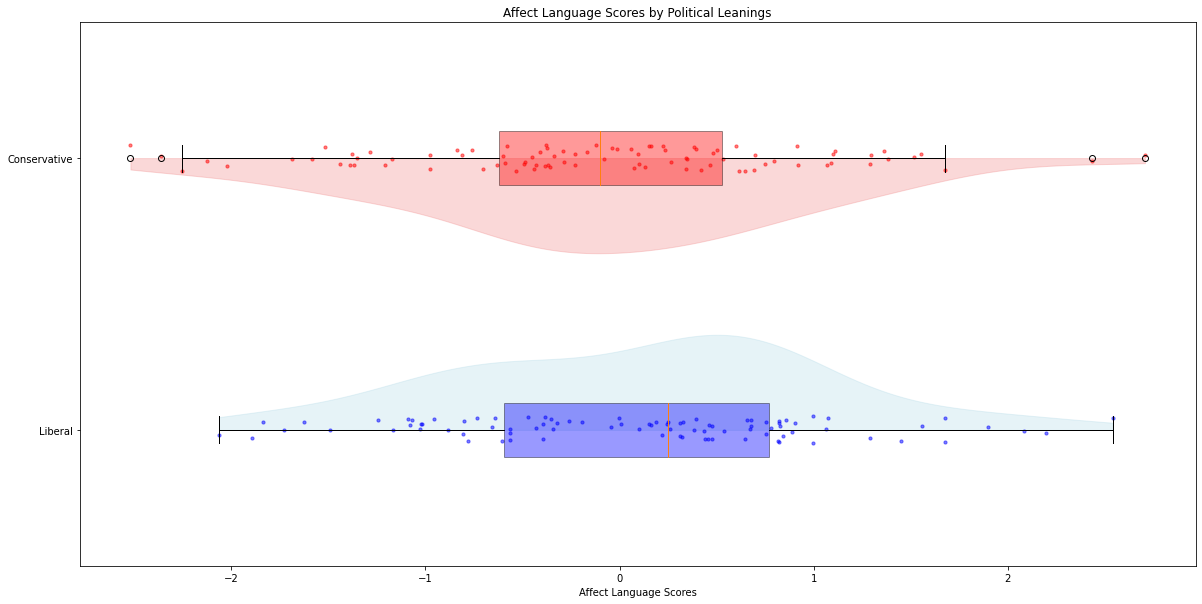

<Figure size 432x288 with 0 Axes>

In [17]:
data_liberal = df[df['label']==1]['UniquelyEmotional_zscore']
data_conservative = df[df['label']==0]['UniquelyEmotional_zscore']

fig, ax = plt.subplots(figsize=(20, 10))

# Boxplot data
bp_liberal = ax.boxplot(data_liberal, patch_artist=True, vert=False, positions=[1], widths=0.2)
bp_conservative = ax.boxplot(data_conservative, patch_artist=True, vert=False, positions=[2], widths=0.2)

# Change boxplot colors
for patch in bp_liberal['boxes']:
    patch.set_facecolor('blue')
    patch.set_alpha(0.4)

for patch in bp_conservative['boxes']:
    patch.set_facecolor('red')
    patch.set_alpha(0.4)

# Violinplot data
vp_liberal = ax.violinplot(data_liberal, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)
vp_conservative = ax.violinplot(data_conservative, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)

# Change violinplot colors
for b in vp_liberal['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightblue')

for b in vp_conservative['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    shift_amount = 1  # Adjust this value to align the violin plot with the label
    b.get_paths()[0].vertices[:, 1] += shift_amount  # Shift the violin plot up
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightcoral')

# Scatterplot data
scatter_colors = ['blue', 'red']
for idx, features in enumerate([data_liberal, data_conservative]):
    y = np.full(len(features), idx + 1)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=10, c=scatter_colors[idx], alpha=0.5)

plt.yticks([1, 2], ['Liberal', 'Conservative'])  # Set y-axis labels
plt.xlabel('Affect Language Scores')
plt.title("Affect Language Scores by Political Leanings")
plt.show()
plt.savefig('emotional_box.png')

## Moral - Emotional

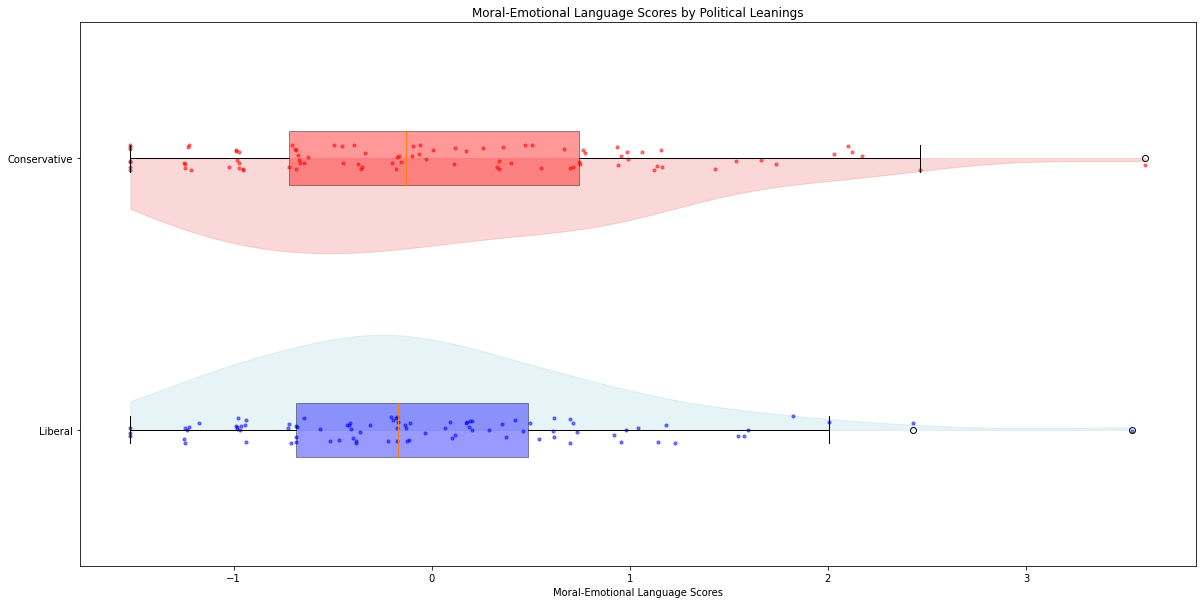

<Figure size 432x288 with 0 Axes>

In [18]:
data_liberal = df[df['label']==1]['MoralEmotional_zscore']
data_conservative = df[df['label']==0]['MoralEmotional_zscore']

fig, ax = plt.subplots(figsize=(20, 10))

# Boxplot data
bp_liberal = ax.boxplot(data_liberal, patch_artist=True, vert=False, positions=[1], widths=0.2)
bp_conservative = ax.boxplot(data_conservative, patch_artist=True, vert=False, positions=[2], widths=0.2)

# Change boxplot colors
for patch in bp_liberal['boxes']:
    patch.set_facecolor('blue')
    patch.set_alpha(0.4)

for patch in bp_conservative['boxes']:
    patch.set_facecolor('red')
    patch.set_alpha(0.4)

# Violinplot data
vp_liberal = ax.violinplot(data_liberal, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)
vp_conservative = ax.violinplot(data_conservative, points=500, vert=False, widths=0.7, showmeans=False, showextrema=False, showmedians=False)

# Change violinplot colors
for b in vp_liberal['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightblue')

for b in vp_conservative['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    shift_amount = 1  # Adjust this value to align the violin plot with the label
    b.get_paths()[0].vertices[:, 1] += shift_amount  # Shift the violin plot up
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], 1, 2)
    b.set_color('lightcoral')

# Scatterplot data
scatter_colors = ['blue', 'red']
for idx, features in enumerate([data_liberal, data_conservative]):
    y = np.full(len(features), idx + 1)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=10, c=scatter_colors[idx], alpha=0.5)

plt.yticks([1, 2], ['Liberal', 'Conservative'])  # Set y-axis labels
plt.xlabel('Moral-Emotional Language Scores')
plt.title("Moral-Emotional Language Scores by Political Leanings")
plt.show()
plt.savefig('moralemotional_box.png')

## Statistical

## Moral

In [19]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate the moral language scores by label
liberal_scores = df[df['label'] == 1]['UniquelyMoral_zscore']
conservative_scores = df[df['label'] == 0]['UniquelyMoral_zscore']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(liberal_scores, conservative_scores)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean Moral Language scores between liberal and conservative articles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean Moral Language scores between liberal and conservative articles.")


T-statistic: -1.7361418874541872
P-value: 0.08426905982350448
Fail to reject the null hypothesis. There is no significant difference in mean Moral Language scores between liberal and conservative articles.


## Emotional

In [20]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate the moral language scores by label
liberal_scores = df[df['label'] == 1]['UniquelyEmotional_zscore']
conservative_scores = df[df['label'] == 0]['UniquelyEmotional_zscore']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(liberal_scores, conservative_scores)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean Affect Language scores between liberal and conservative articles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean Affect Language scores between liberal and conservative articles.")


T-statistic: 1.3577137346414356
P-value: 0.17627324121640509
Fail to reject the null hypothesis. There is no significant difference in mean Affect Language scores between liberal and conservative articles.


## Moral - Emotional

In [21]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate the moral language scores by label
liberal_scores = df[df['label'] == 1]['MoralEmotional_zscore']
conservative_scores = df[df['label'] == 0]['MoralEmotional_zscore']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(liberal_scores, conservative_scores)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean Moral-Emotional Language scores between liberal and conservative articles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean Moral-Emotional Language scores between liberal and conservative articles.")


T-statistic: -0.33978366215091227
P-value: 0.7344200490701734
Fail to reject the null hypothesis. There is no significant difference in mean Moral-Emotional Language scores between liberal and conservative articles.
